# Modelo para Projetos de Mineração de Dados usando CRISP-DM
*Luiz Rodrigues (ultima atualização: 20/07/2022).*

## Apresentação

* Esse notebook fornece um modelo para planejamento, condução, e relato de projetos de mineração de dados
* O notebook está organizado de acordo com as seis fases do CRISP-DM

## Usando o Modelo
Para usar este modelo, basta:
1. Fazer uma cópia do mesmo (para o seu Google Drive, por exemplo);
2. Alterar/preencher as células de forma a satisfazer e justificar os pontos de cada uma das tarefas das seis fases do CRISP-DM

## Organização
* Este modelo está organizado em seis seções, uma para cada fase do CRISP-DM;
* Cada seção está organizada em subsções, uma para cada tarefa da respectiva fase.

## Recomendações
Para um melhor proveito desse notebook, sugiro a leitura das principais referencias que usei para escrevê-lo:
* "What is CRISP DM?", de Nick Hotz: https://www.datascience-pm.com/crisp-dm-2/
* "CRISP-DM is Still the Most Popular Framework for Executing Data Science Projects", de Jeff Saltz: https://www.datascience-pm.com/crisp-dm-still-most-popular/
* "CRISP-DM: Towards a Standard Process Model for Data Mining", de Wirth e Hipp: http://cs.unibo.it/~danilo.montesi/CBD/Beatriz/10.1.1.198.5133.pdf

Como um exemplo prático de uso do CRISP-DM, cito o artigo *GARFIELD - A Recommender System to Personalize Gamified Learning*.
* O artigo pode ser acessado no seguinte link: https://rodriguesluiz.github.io/publications/garfield.pdf
* Uma breve apresentação da pesquisa (em inglês) pode ser vista em: https://www.youtube.com/watch?v=vqvC3BSn124
* Materiais suplementares da pesquisa, incluindo o arquivo usado para analisar os dados, pode ser acessado em: https://osf.io/znyx2

# 1 Entendimento do Negócio

Essa fase foca em entender os objetivos e requisitos do projeto. Esta é uma das fases mais importantes, uma vez que ela fundamenta todas as outras. Ela é composta por quatro subfases, as quais são apresentadas na sequência.


## 1.1 Determinar os objetivos do negócio

Da perspectiva do negócio, o que o cliente realmente quer alcançar?
- Uma forma de identificar as reações dos reviews deixado pelos usuários dentro do sistema.

Quais são os critérios de sucesso?
- Obter corretamente a reação dos usuários.

## 1.2 Avaliar a Situação

Quais recursos estão disponíveis?
- Os recursos disponiveis sao o feedback e avaliação de estrelas feitas pelo usuário

Quais são os requisitos do projeto?
- Possibilitar que, a partir dos reviews deixados pelos usuários, possamos identificar o sentimento dos usuarios, assim permitindo identificar se o review é positivo ou negativo.

Quais são os riscos e contingencias?
- Não atingir objetivo amejado.

Qual o custo-benefício da situação?
- Uma vez que temos dados, recursos computacionais e humanos à nossa disposição, consideramos que o custo-benefício deste projeto é positivo.

## 1.3 Determinar os objetivos da mineração de dados

Do ponto de vista técnico, da mineração de dados, quais são os critérios de sucesso?
- Criar um modelo que permita indentificar pelos 60% do comentários.

## 1.4 Planejar o projeto

Quais tecnologias e ferramentas serão usadas?
* *Python para programação*,
* *Pandas para lidar com os dados*,
* *Sklearn para lidar com dados e modelagem*,
* *Google Collab e Visual Studio Code para documentação, condução*,
* *Github para compartilhamento da solução entre a equipe*,

Qual o plano para cada fase do projeto?
* *O plano consiste na realização de cada etapa do projeto de forma gradual e progressiva dentro do cronograma estipulado para o desenvolvimento, buscado sempre excelencia nos resultados obtidos.*

# 2 Entendimento dos Dados

Essa fase foca em identificar, coletar e analisar conjuntos de dados que podem nos ajudar a alcançar os objetivos do projeto. Ela também é composta por quatro tarefas.

In [19]:
'''

Link do Dataset usado: https://www.kaggle.com/code/frankschindler1/sentiment-analysis-tripadvisor-reviews

'''

#Importando bibliotenas
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from wordcloud import WordCloud

# Pré-processamento e avaliação
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('rslp')
nltk.download('averaged_perceptron_tagger')
nltk.download('mac_morpho')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package mac_morpho to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_d

True

## 2.1 Coleta de dados inicial

Coletar os dados necessários e - se necessário - carrega-los na ferramenta de análise.
- Tendo em vista que o nosso projeto da jornada não está finalizado, logo não possui feedback de usuários, utilizaremos um dataset do TripAdvisor Hotel (O dataset pode ser encontrado no link: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews).

In [20]:
# Importando dataser
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

df = df[:500]

df.head()

#Mostrando infos de dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  500 non-null    object
 1   Rating  500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


## 2.2 Descrever os dados

Examine os dados e documente suas principais propriedades, como formato, número de linhas, colunas, etc.
* *Os dados estão organizados em um arquivo de texto no formato csv.*
* *O arquivo 'tripadvisor_hotel_reviews.csv' apresenta as informações dos reviews. Logo, cada linha representa um review. Ele contém 2 colunas. Por simplicidade, vou descrever apenas algumas delas:*
*  *Review (text): review deixo pelo usuário*
*  *Rating (int): curso em que o aluno está matriculado*


C:\Users\ferna\AppData\Local\Temp\ipykernel_5820\777348901.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)


<AxesSubplot: title={'center': 'Rating = 5'}, xlabel='Length', ylabel='Length'>

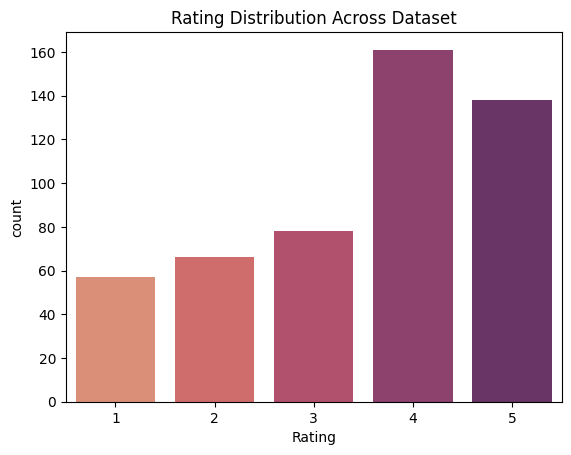

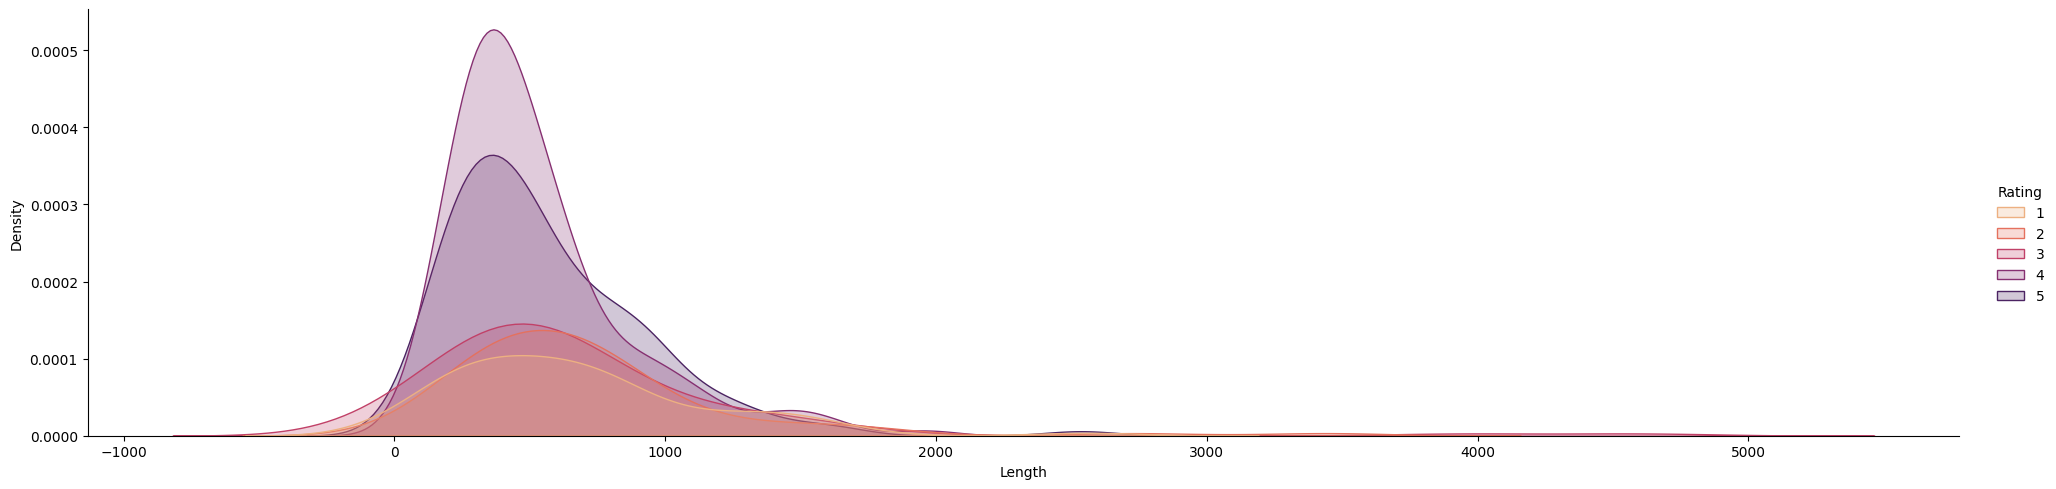

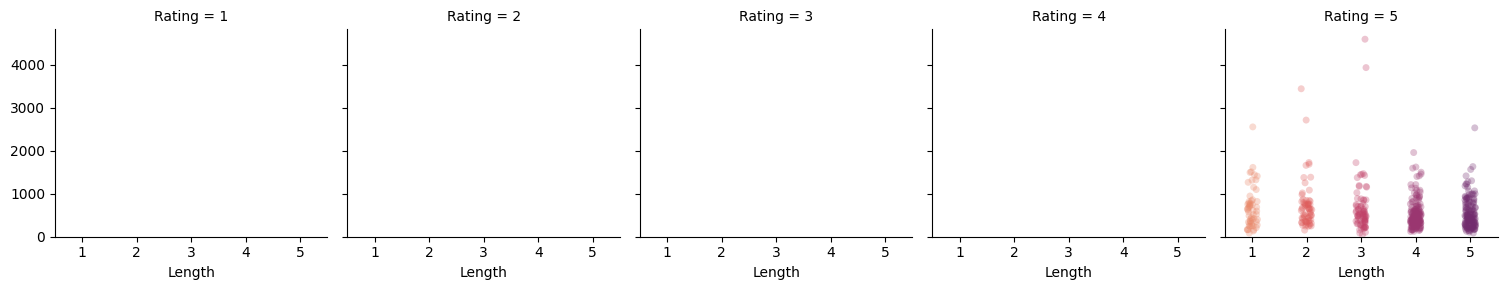

In [21]:
#Visualizando os dados
sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution Across Dataset')

# Comprimento da palavra na frase
df['Length'] = df['Review'].apply(len)
df.head()

sns.displot(data=df, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=4)

g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Length', color='#973aa8')

sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)

## 2.3 Explorar os dados

Mergulhe nos dados, faça visualizações, identifique relações entre os dados, etc.

## 2.4 Verifique a qualidade dos dados

Verifique e documente qualquer problema de qualidade/limpeza dos dados.

In [22]:
#  Alterar a classificação para ser mais simples e mais fácil de entender

def rating(score):
    print(score)
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Netral'
    else:
        return 'Bad'

df['Rating'] = df['Rating'].apply(rating)

df.head()

# Total de palavras no conjunto de dados antes da limpeza
length = df['Length'].sum()

print('Original:')
print(df['Review'][0])
print()

sentence = []
for word in df['Review'][0].split():
    stemmer = SnowballStemmer('english')
    sentence.append(stemmer.stem(word))
print('Stemming:')
print(' '.join(sentence))
print()

sentence = []
for word in df['Review'][0].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, 'v'))
print('Lemmatization:')
print(' '.join(sentence))

def cleaning(text):
    #remover pontuações e letras maiúsculas
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()
    
   #remover palavras irrelevantes
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]
    
    #lematizar a palavra
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

df['Review'] = df['Review'].apply(cleaning)


df['Length'] = df['Review'].apply(len)
new_length = df['Length'].sum()

print('Comprimento total do texto antes da limpeza: {}'.format(length))
print('Comprimento total do depois antes da limpeza: {}'.format(new_length))

df.to_csv('cleaned_df.csv', index=False)

4
2
3
5
5
5
5
4
5
5
2
4
4
3
4
1
2
5
5
3
5
5
4
5
2
3
4
3
4
4
4
4
1
2
4
4
4
5
4
4
1
4
2
4
2
2
3
3
5
5
5
4
5
5
3
5
3
5
5
5
4
5
5
5
4
1
5
3
3
1
4
2
5
5
4
5
1
1
4
2
2
5
5
2
4
4
5
4
1
4
4
5
1
4
4
4
4
1
3
1
3
1
5
3
3
4
4
5
5
3
4
5
4
4
5
4
5
5
4
4
4
5
4
5
4
5
3
5
4
4
3
4
4
3
1
3
3
4
3
3
1
1
3
4
3
4
4
5
5
5
4
5
5
1
3
2
1
5
2
4
1
5
3
2
4
3
2
4
3
4
4
3
4
4
1
4
1
4
4
2
4
1
2
4
5
5
4
3
3
2
2
2
2
4
3
4
1
1
5
3
1
3
2
5
4
4
3
2
3
3
2
1
5
5
4
3
4
4
5
3
5
5
5
5
4
5
4
5
5
5
4
1
5
2
3
4
4
4
3
4
5
4
4
1
5
4
5
5
2
3
2
4
3
3
4
1
3
1
4
2
4
2
2
4
3
2
5
5
3
2
5
5
5
4
4
4
4
4
5
5
4
4
3
2
4
2
5
5
5
4
2
4
1
4
1
4
1
4
5
3
2
5
2
5
5
5
4
5
3
3
1
1
2
5
5
4
5
4
3
5
2
2
3
1
5
4
3
1
3
5
1
4
2
1
2
2
1
4
4
4
4
4
1
1
3
3
2
3
1
1
5
5
4
5
4
5
5
4
5
2
5
5
5
4
4
1
4
1
1
1
4
5
4
5
4
3
4
2
3
2
4
4
4
4
1
5
5
4
5
2
4
4
5
2
4
3
5
4
5
4
5
5
2
1
4
3
5
2
5
3
5
4
2
2
5
3
2
4
5
4
4
5
4
1
2
5
4
3
4
3
4
4
1
3
5
4
5
2
5
4
4
5
2
5
5
2
5
5
3
5
4
4
4
1
5
1
2
2
3
4
3
4
5
2
4
5
5
4
2
4
4
4
3
5
5
2
5
2
5
1
3
4
1
2
4
1
1
3
3
3
4
4
4
5
4
3
3
4
5
5


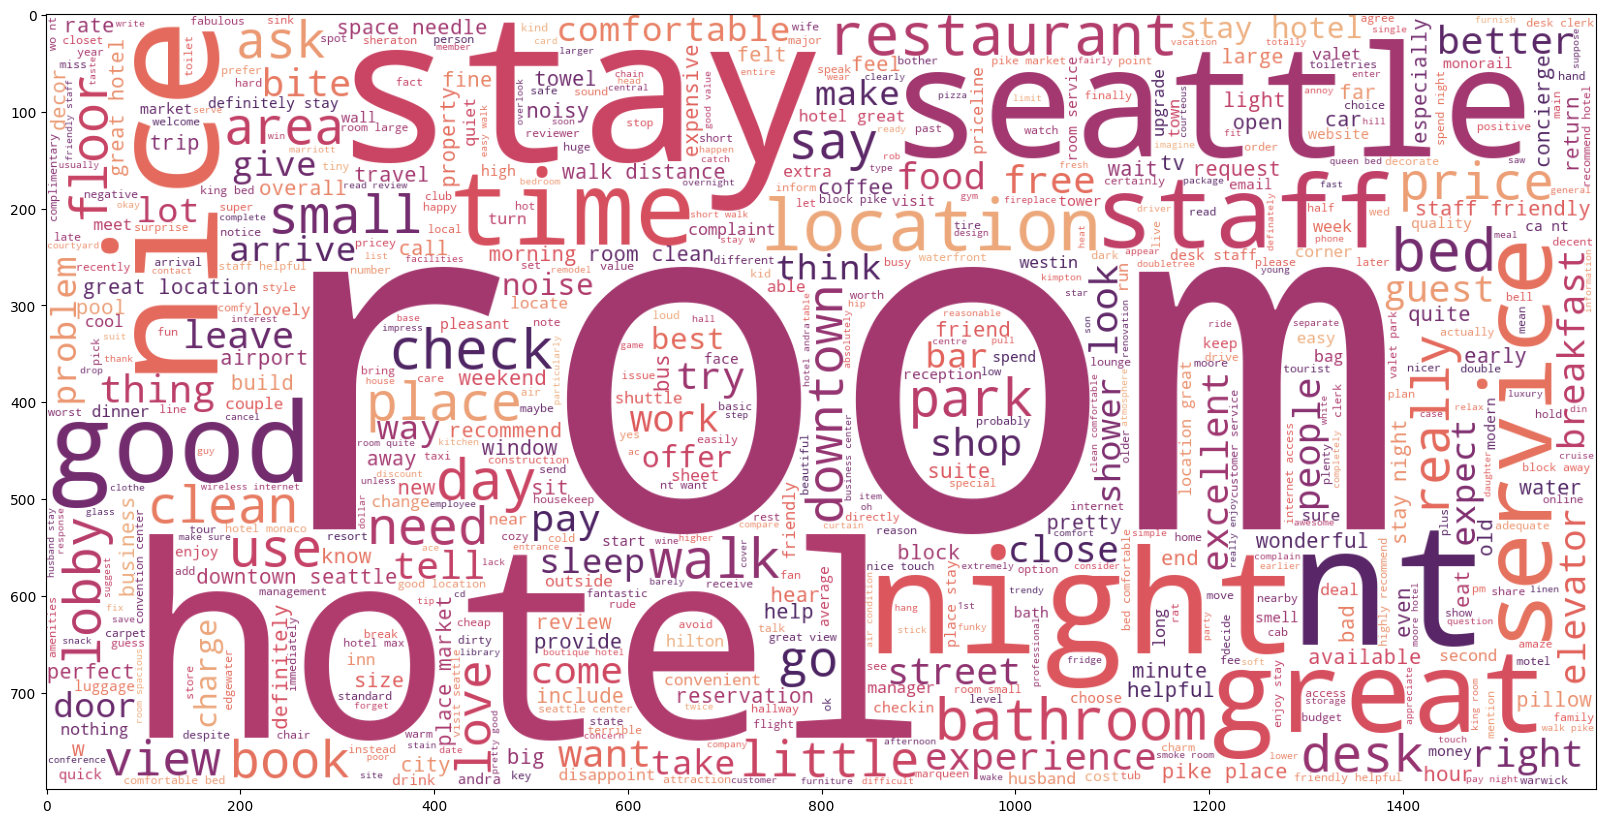

In [23]:
# Após a limpeza, encontrar a palavra mais usada
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=1600,background_color="white", colormap='flare').generate(' '.join(df['Review']))

plt.imshow(wc)

X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.2)

# 3 Preparação dos Dados

Essa fase prepara o(s) conjunto(s) de dados para a modelagem. Ela envolve cinco tarefas.

In [24]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

pickle.dump(tfid, open('tfidf.pkl', 'wb'))

models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB()]

accuracy = []

for model in models:
    cross_val = cross_val_score(model, train_tfid_matrix, y_train, scoring='accuracy',
                               cv=StratifiedKFold(10)).mean()
    accuracy.append(cross_val)

models_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC',
         'LogisticRegression', 'KNeighborsClassifier', 'BernoulliNB']

acc = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
acc

log = LogisticRegression(max_iter=1000)
log.fit(train_tfid_matrix, y_train)

pred = log.predict(test_tfid_matrix)

pickle.dump(log, open('ml_model.pkl', 'wb'))

ml = pickle.load(open('ml_model.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))
def ml_predict(text):
    clean_text = cleaning(text)
    tfid_matrix = tfidf.transform([clean_text])
    pred_proba = ml.predict_proba(tfid_matrix)
    idx = np.argmax(pred_proba)
    pred = ml.classes_[idx]
    
    return pred, pred_proba[0][idx]

ml_predict('poor room service')

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[11 14  0]
 [ 1 53  0]
 [ 0 21  0]]
              precision    recall  f1-score   support

         Bad       0.92      0.44      0.59        25
        Good       0.60      0.98      0.75        54
      Netral       0.00      0.00      0.00        21

    accuracy                           0.64       100
   macro avg       0.51      0.47      0.45       100
weighted avg       0.55      0.64      0.55       100



c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## 3.1 Selecione os dados

Determine qual conjunto de dados será usado e documente suas escolhas.

## 3.2 Limpe os dados

É comum que as tarefas dessa fase sejam corrigir, preencher ou remover valores Normalmente, esta é a tarefa mais demorada, sendo de extrema importancia para o sucesso da análise. Lembre-se: garbage-in, garbage-out; ou seja, se entra lixo, sai lixo.

## 3.3 Construa dados

Derive novos atributos que irão ajudar suas análises. Exemplo: derivar o IMC a partir dos atributos Peso e Altura.


## 3.4 Integre os dados

Crie novos conjuntos de dados ao combinar dados de várias fontes.

## 3.5 Formate os dados

A reformatação de dados é necessária em certas ocasiões. Exemplo: converter "1.7" (string) para 1.7 (float)

# 4 Modelagem

Nessa fase, é provavel que você irá criar e analisar varios modelos a partir de muitas técnicas. Essa fase envolve quatro tarefas.

In [25]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)
# print(tokenizer.word_index)
total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))
pickle.dump(lb, open('label.pkl', 'wb'))

model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))

metrics = pd.DataFrame(model.history.history)
metrics[['accuracy', 'val_accuracy']].plot()
metrics[['loss', 'val_loss']].plot()

pred2 = model.predict(test_padded)

true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

model.save('dl_model.h5')

Total distinct words: 5119
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           40952     
                                                                 
 bidirectional (Bidirectiona  (None, 32)               3200      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                             

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/embedding/embedding_lookup' defined at (most recent call last):
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ferna\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ferna\AppData\Local\Temp\ipykernel_5820\1052668306.py", line 33, in <module>
      model.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ferna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential/embedding/embedding_lookup'
indices[15,619] = 5119 is not in [0, 5119)
	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_train_function_5815]

## 4.1 Selecione técnicas de modelagem

Determine quais algoritmos você vai experimentar. Exemplos: regressão linear, árvore de decisão, redes neurais, etc.

In [ ]:
# Regressão Logística
def ml_predict(text):
    clean_text = cleaning(text)
    tfid_matrix = tfid.transform([clean_text])
    pred = log.predict(tfid_matrix)[0]
    
    return pred

# Rede Neural
def dl_predict(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)

    pred = model.predict(padded)
    # Recuperar o nome do rótulo
    result = lb.inverse_transform(pred)[0]
    
    return result



## 4.2 Gere sua abordagem de teste

É comum que você separe seu conjunto de dados em, por exemplo, conjuntos de trainamento, validação, e teste. Embora essa fase faça parte da quarta fase do CRISP-DM, **recomendo que ela seja realizada antes de qualquer análise dos dados para minimizar ao máximo as chances de *overfitting*.**

In [ ]:
text = 'Such a comfy place to stay with the loved one'

print('Previsão usando regressão logística: {}'.format(ml_predict(text)))
print('Previsão usando Rede Neural {}'.format(dl_predict(text)))

text2 = 'Awful room services and slow wifi connection'

print('Previsão usando regressão logística: {}'.format(ml_predict(text2)))
print('Previsão usando Rede Neural: {}'.format(dl_predict(text2)))

text3 = 'Hard to get here but the scenery is wonderful'

print('Previsão usando regressão logística: {}'.format(ml_predict(text3)))
print('Previsão usando Rede Neural: {}'.format(dl_predict(text3)))


## 4.3 Construa o modelo

Na prática, uma das fases mais simples. Exemplo: *reg = LinearRegression().fit(X, y)*

## 4.4 Analise o modelo

Interprete todos os modelos criados no passo anterior, com base nos critérios de sucesso, abordagem de teste, conhecimento de domínio, etc.

# 5 Avaliação

Por um lado, a tarefa 4.4 foca no ponto de vista técnico. Por outro lado, a fase Avaliação foca em avaliar qual modelo melhor se encaixa no negócio e quais são os próximos passos. Ela envolve três tarefas.

## 5.1 Avaliar os resultados

Os modelos alcançam os critérios de sucesso de negócio?

Quais modelos devemos aprovar para o negócio?

## 5.2 Revise o processo

Revise o projeto, resuma os resultados e corrija tudo que for necessário. Por exemplo:
* Alguma coisa não foi analisada de forma correta?
* Todos os passos foram executados de forma adequada?

## 5.3 Defina os próximos passos

Com base nas três ultimas tarefas, define se é hora de mover para a implantação, fazer uma nova iteração, ou iniciar novos projetos.

# 6 Implantação

Um modelo só é útil se o cliente pode acessar seus resultados. Para que isso seja possível, essa fase envolve quatro tarefas.

## 6.1 Planeje a Implantação

Desenvolva e documente o plano de implantação do modelo.

## 6.2 Planeje a monitoração e manutenção

Desenvolva um plano rigoroso de monitoramento e manutenção do modelo para evitar problemas operacionais.

## 6.3 Produza um relatório final

Documente um resumo final do projeto, podendo incluir uma apresentação final dos resultados da mineração de dados.

## 6.4 Revise o projeto

Faça uma retrospectiva do projeto, sobre o que foi bom, o que poderia ser melhor, e como melhorar no futuro.